# Implementação e comparação dos Métodos de Newton e do Gradiente

In [73]:
# Aqui, você pode mudar a função a ser minimizada.
# Não se esqueça de calcular o gradiente e a 
# Hessiana (necessária para o método de Newton)
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def f(x):
    # Função de Rosenbrock
    f = (1-x[0])**2+10*(x[1]-x[0]**2)**2
    return f
def g(x):
    g = np.zeros((2,))
    g[0] = 2*x[0]-2-40*x[0]*(x[1]-x[0]**2)
    g[1] = 20*(x[1]-x[0]**2)
    return g
def H(x):
    H = np.zeros((2,2))
    H[0,0] = 2-40*(x[1]-x[0]**2)+80*x[0]**2
    H[0,1] = -40*x[0]
    H[1,0] = H[0,1]
    H[1,1] = 20
    return H

Escolha um ponto inicial:

In [79]:
x0 = np.asarray([-1., 2.])

Escolha uma tolerância a ser aplicada ao gradiente:

In [76]:
eps = 1e-5

Se quiser ver um gráfico do caminho das iteradas ao final da execução do método, selecione ```plot = True```

In [77]:
plot = True
# plot = False

## Método de Newton

Iteration 0: [-1.10526316  1.21052632]
Iteration 1: [ 0.61809285 -2.58791716]
Iteration 2: [0.62441591 0.38985525]
Iteration 3: [0.99969991 0.85856184]
Iteration 4: [0.99977854 0.99955712]
Iteration 5: [1.         0.99999995]
           Convergência!                
  x final: [1.         0.99999995]
  f final: 2.4054577795894413e-14
  g final: [ 1.96176387e-06 -9.80909314e-07]


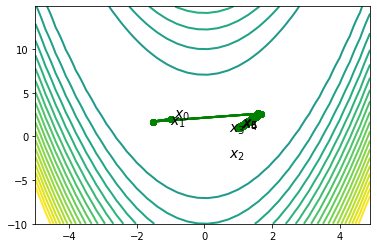

In [80]:
# Vamos começar!
itnum = 0
x = np.copy(x0)

# Vamos guardar aqui as coordenadas dos pontos para fazer
# o gráfico do caminho das iteradas
lista_x = [x[0]]
lista_y = [x[1]]

if plot:
    # Vamos fazer um gráfico com as curvas
    # de nível da função e verificar o 
    # caminho das iteradas
    XX = np.arange(-5, 5, 0.3)
    Y = np.arange(-10, 15, 0.3)
    XX, Y = np.meshgrid(XX, Y)
    Z = f([XX,Y])
    fig_contour = plt.figure()
    levels = np.arange(-10000,10000, 500)
    CP = plt.contour(XX, Y, Z, levels, linewidths = 2)
    plt.text(x[0]+0.1,x[1]+0.1, r"$x_0$",fontsize=14)

# Calculamos o gradiente e começamos o laço principal:
grad = g(x)

while (np.sqrt(grad[0]**2+grad[1]**2) > eps) and (itnum < 2000):
    # Direção de Newton:
    x = x - np.dot(np.linalg.inv(H(x)),grad)
    #
    lista_x.append(x[0])
    lista_y.append(x[1])
    print("Iteração {}: {}".format(itnum,x))
    itnum += 1
    grad = g(x)
    if plot:
        CP.ax.plot(matX, matY, 'go-', linewidth=2)
        plt.text(x[0]+0.1,x[1]+0.1,r"$x_"+str(itnum)+"$",fontsize=14)

# Vamos verificar se obtivemos convergência, ou se 
# o método parou por ter atingido o número máximo de iterações:
if np.sqrt(grad[0]**2+grad[1]**2) <= eps:
    print("========================================")
    print("           Convergência!                ")
    print("  x final: {}".format(x))
    print("  f final: {}".format(f(x)))
    print("  g final: {}".format(grad))
    print("========================================")
    plt.show()
else:
    print("++++++++++++++++++++++++++++++++++++++++")
    print("           Não convergimos!             ")
    print("++++++++++++++++++++++++++++++++++++++++")


## Método do Gradiente com Busca Linear

In [82]:
def buscalinear(ponto_inicial, p, fun, g_fun, c1=1e-4):
    alpha = 1 # A escolha do alpha inicial também pode ser discutida, 
              # mas aqui escolheremos simplesmente alpha=1.
    f_inicial = fun(ponto_inicial)
    grad = g_fun(ponto_inicial)
    # Vamos calcular o produto separadamente para não
    # repetirmos essa operação a cada iteração
    produto = np.dot(grad, p)
    #
    ponto_novo = ponto_inicial + alpha*p
    its = 0
    while fun(ponto_novo) > f_inicial + c1*alpha*produto:
        alpha = 0.9*alpha
        ponto_novo = ponto_inicial + alpha*p
        its += 1
    return ponto_novo

Iteração 0: [-1.53211179  1.70438234]
Iteração 1: [1.66032094 2.62757644]
Iteração 2: [1.58260333 2.64785678]
Iteração 3: [1.65156674 2.6228558 ]
Iteração 4: [1.58693743 2.63932288]
Iteração 5: [1.64370311 2.6182095 ]
Iteração 6: [1.59043967 2.63133555]
Iteração 7: [1.63667831 2.61355892]
Iteração 8: [1.59316856 2.6237953 ]
Iteração 9: [1.63043051 2.60885141]
Iteração 10: [1.59519224 2.61662053]
Iteração 11: [1.62489032 2.60405536]
Iteração 12: [1.59343928 2.61037671]
Iteração 13: [1.62275994 2.59792575]
Iteração 14: [1.59182009 2.60410935]
Iteração 15: [1.62051193 2.59185212]
Iteração 16: [1.5903278  2.59782323]
Iteração 17: [1.6181555  2.58583438]
Iteração 18: [1.58895241 2.59152376]
Iteração 19: [1.61570233 2.57987123]
Iteração 20: [1.58768123 2.58521673]
Iteração 21: [1.61316606 2.57396026]
Iteração 22: [1.58649946 2.57890805]
Iteração 23: [1.61056175 2.56809803]
Iteração 24: [1.58539083 2.5726036 ]
Iteração 25: [1.60790538 2.56228025]
Iteração 26: [1.58433818 2.56630899]
Iteração 

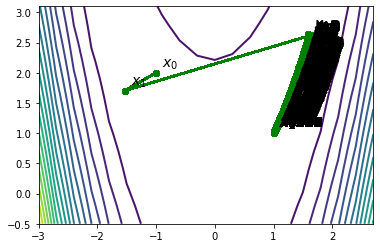

In [85]:
# Para o método do gradiente, usamos uma tolerância menos exigente:
eps = 1e-3

# O ponto inicial é o mesmo que usamos para o método de Newton
x = np.copy(x0)
itnum = 0

# Vamos guardar aqui as coordenadas dos pontos para fazer
# o gráfico do caminho das iteradas
lista_x = [x[0]]
lista_y = [x[1]]

if plot:
    # Vamos fazer um gráfico com as curvas
    # de nível da função e verificar o 
    # caminho das iteradas
    XX = np.arange(-3, 3, 0.3)
    Y = np.arange(-0.5, 3.2, 0.3)
    XX, Y = np.meshgrid(XX, Y)
    Z = f([XX,Y])
    fig_contour = plt.figure()
    CP = plt.contour(XX, Y, Z, 20, linewidths = 2)
    plt.text(x[0]+0.1,x[1]+0.1, r"$x_0$",fontsize=14)

# Calculamos o gradiente e começamos o laço principal:
grad = g(x)

while (np.sqrt(grad[0]**2+grad[1]**2) > eps) and (itnum < 2000):
    # Direção do gradiente
    p = -grad
    x = buscalinear(x, p, f, g)
    #
    lista_x.append(x[0])
    lista_y.append(x[1])
    print("Iteração {}: {}".format(itnum,x))
    itnum += 1
    # Recalculamos o gradiente no novo ponto e continuamos
    grad = g(x)
    p = -grad
    if plot:
        CP.ax.plot(matX, matY, 'go-', linewidth=2)
        plt.text(x[0]+0.1,x[1]+0.1,r"$x_"+str(itnum)+"$",fontsize=14)

# Vamos verificar se obtivemos convergência, ou se 
# o método parou por ter atingido o número máximo de iterações:
if np.sqrt(grad[0]**2+grad[1]**2) <= eps:
    print("========================================")
    print("           Convergência!                ")
    print("  x final: {}".format(x))
    print("  f final: {}".format(f(x)))
    print("  g final: {}".format(grad))
    print("========================================")
    plt.show()
else:
    print("++++++++++++++++++++++++++++++++++++++++")
    print("           Não convergimos!             ")
    print("++++++++++++++++++++++++++++++++++++++++")